**Plotlar plotly oldugundan kaggle dan indirilen ibynb dosyasinda gozukmuyor, kaggle da kod calistirilinca ancak gozukuyor.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

## Import Data

In [2]:
forest = pd.read_csv('../input/forest-cover-type-prediction/train.csv')
forest.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

**Dataset Info:**

**There are seven types of the forest cover;** 1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

***Data Fields***

Elevation - Elevation in meters

Aspect - Aspect in degrees azimuth

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

## EDA

In [3]:
forest.shape

(15120, 56)

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
## Missing Values
forest.isna().sum().sum() # tum datadaki nan  yaisi

0

Daha iyi gorsellestirme icin isimleri veriye yeniden ekleriz

In [6]:
forest['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)
forest.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
                       "Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
                       "Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                       "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"}, inplace=True)

In [7]:
forest.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology',
       'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'HD_Fire_Points', 'Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype='object')

In [8]:
## Dummy variables lari eskki haline dondururuz
forest['Wild Areas'] = (forest.iloc[:,11:15]==1).idxmax(1) # 4 sutuna bak hangisinde 1 ise onun column ismini ata demek 
forest['Soil types'] = (forest.iloc[:,15:55]==1).idxmax(1) 

# Gerekli olamayan sutunlari dusur
forest.drop(columns=["Id",'Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], inplace=True)

In [9]:
forest['Soil types'] = forest['Soil types'].str.replace('Soil_Type','ST')

In [10]:
forest

Elevation  Aspect  Slope  HD_Hydrology  VD_Hydrology  HD_Roadways  \
0           2596      51      3           258             0          510   
1           2590      56      2           212            -6          390   
2           2804     139      9           268            65         3180   
3           2785     155     18           242           118         3090   
4           2595      45      2           153            -1          391   
...          ...     ...    ...           ...           ...          ...   
15115       2607     243     23           258             7          660   
15116       2603     121     19           633           195          618   
15117       2492     134     25           365           117          335   
15118       2487     167     28           218           101          242   
15119       2475     197     34           319            78          270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  HD_Fire_Points  \
0                221             232            148            6279   
1                220             235            151            6225   
2                234             238            135            6121   
3                238             238            122            6211   
4                220             234            150            6172   
...              ...             ...            ...             ...   
15115            170             251            214            1282   
15116            249             221             91            1325   
15117            250             220             83            1187   
15118            229             237            119             932   
15119            189             244            164             914   

           Cover_Type        Wild Areas Soil types  
0               Aspen          Rawah_WA       ST29  
1               Aspen          Rawah_WA       ST29  
2      Lodgepole Pine          Rawah_WA       ST12  
3      Lodgepole Pine          Rawah_WA       ST30  
4               Aspen          Rawah_WA       ST29  
...               ...               ...        ...  
15115  Ponderosa Pine  Comanche_Peak_WA        ST4  
15116  Ponderosa Pine  Comanche_Peak_WA        ST4  
15117  Ponderosa Pine  Comanche_Peak_WA        ST4  
15118  Ponderosa Pine  Comanche_Peak_WA        ST4  
15119  Ponderosa Pine  Comanche_Peak_WA        ST2  

[15120 rows x 13 columns]

## Data Visualization
### Categorical Features
#### Cover Type

In [11]:
px.histogram(forest, x='Cover_Type', color='Cover_Type')
# her turden esit sayisda var
# acaba wild area icin de boyle mi

#### Wilderness Areas

In [12]:
px.histogram(forest, x='Wild Areas', color='Cover_Type')

In [13]:
px.sunburst(forest, path=['Wild Areas', 'Cover_Type'], color='Cover_Type')

- Neota en az ormana sahip alan
- Comanche is en cok ormana sahip olan alan
- En cok cesitlilik Comanche'de

#### Soil Types

In [14]:
px.histogram(forest, x='Soil types', color='Cover_Type')

In [15]:
fig = px.pie(forest, names='Soil types') 
fig.update_traces(textposition='inside')

#### Soil Types in each Wild Area

In [16]:
for i in forest['Wild Areas'].unique():
    temp = forest[forest['Wild Areas'] == i][['Wild Areas', 'Soil types', 'Cover_Type']]
    fig = px.histogram(temp, x='Soil types', color='Cover_Type', title=i)
    fig.show()

### Numerical Features

#### Elevation

In [17]:
px.histogram(forest, x='Elevation', color='Cover_Type', marginal='box')

- En alcakta bulunan Cottonwood en yuksekte bulunan Krummholz
- Cesitlilik var

In [18]:
px.histogram(forest, x='Elevation', color='Wild Areas', marginal='box')

#### Aspect

In [19]:
px.histogram(forest, x='Aspect', color='Cover_Type', marginal='rug')

#### Slope

In [20]:
px.histogram(forest, x='Slope', color='Cover_Type', marginal='rug')

#### Horizontal Distance to Hydrology

In [21]:
temp = forest.groupby(['Cover_Type'],as_index=False)[['HD_Roadways']].median() # as_index=False cover in index olmayip column olmasini saglar
px.bar(temp.sort_values(by='HD_Roadways'), x='HD_Roadways', y='Cover_Type', color='Cover_Type')

#### Horizontal Distance to Fire Points

In [22]:
temp = forest.groupby(['Cover_Type'],as_index=False)[['HD_Fire_Points']].median() # as_index=False cover in index olmayip column olmasini saglar
px.bar(temp.sort_values(by='HD_Fire_Points'), x='HD_Fire_Points', y='Cover_Type', color='Cover_Type')

#### Correlation

<AxesSubplot:>

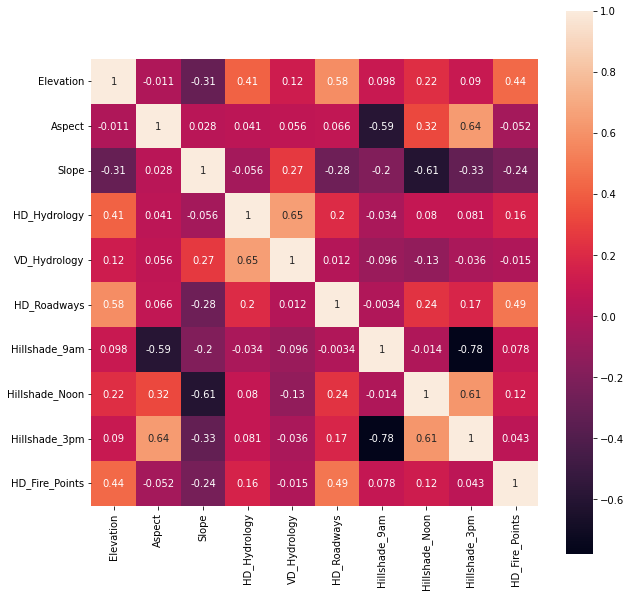

In [23]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(forest.corr(), annot=True, square=True)

### Scatter Plots

#### Elevation-HD Roadways

In [24]:
px.scatter(forest, x='Elevation', y='HD_Roadways', color='Cover_Type')

In [25]:
px.scatter(forest, x='Elevation', y='HD_Roadways', color='Wild Areas')

## Classification

In [26]:
forest = pd.read_csv('../input/forest-cover-type-prediction/train.csv')

In [27]:
x=forest.drop(columns=['Id', 'Cover_Type'])
y=forest.Cover_Type
y=y-1 # 0 dan baslamasi lazim xgboost icin

In [28]:
def classification_(X,y): 
    lgbc=LGBMClassifier()
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[lgbc, xgbc,g,b,k,svc,d,log,gbc,rf,ab]
    algos_name=['LGBMClassifier','XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','RandomForest','AdaBoost']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X_train,y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [29]:
classification_(x,y)

AccuracyScore  PrecisionScore  RecallScore  f1_Score
LGBMClassifier         0.855159        0.855159     0.855159  0.855159
XGBClassifier          0.855159        0.855159     0.855159  0.855159
RandomForest           0.852844        0.852844     0.852844  0.852844
KNeighbors             0.802579        0.802579     0.802579  0.802579
DecisionTree           0.789683        0.789683     0.789683  0.789683
GradientBoosting       0.784722        0.784722     0.784722  0.784722
SVC                    0.636905        0.636905     0.636905  0.636905
Gaussian               0.585317        0.585317     0.585317  0.585317
Bernoulli              0.583664        0.583664     0.583664  0.583664
LogisticReg            0.479497        0.479497     0.479497  0.479497
AdaBoost               0.424934        0.424934     0.424934  0.424934

## Deep Learning

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(3000,activation='relu'))
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1000,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(7, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam", metrics=["accuracy"])
# 2 secenek varsa => loss='binary_crossentropy' yaptık,3 seçenekli bir cevap bekleseydik 
# loss='categorical_crossentropy' veya loss=sparse_categorical_crossentropy' kullanacaktık.

2022-08-31 19:55:31.600518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:55:31.605206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:55:31.605967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 19:55:31.607061: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [31]:
history = model.fit(x,y, validation_split=0.20, epochs=100, verbose=1)

2022-08-31 19:55:37.640736: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
378/378 [==============================] - 3s 4ms/step - loss: 4.4417 - accuracy: 0.2336 - val_loss: 1.5704 - val_accuracy: 0.3343
Epoch 2/100
378/378 [==============================] - 1s 3ms/step - loss: 1.3269 - accuracy: 0.4126 - val_loss: 1.1707 - val_accuracy: 0.4881
Epoch 3/100
378/378 [==============================] - 2s 4ms/step - loss: 1.1275 - accuracy: 0.4935 - val_loss: 1.0949 - val_accuracy: 0.5387
Epoch 4/100
378/378 [==============================] - 1s 4ms/step - loss: 1.0218 - accuracy: 0.5447 - val_loss: 0.9491 - val_accuracy: 0.5952
Epoch 5/100
378/378 [==============================] - 1s 3ms/step - loss: 0.9669 - accuracy: 0.5682 - val_loss: 0.9245 - val_accuracy: 0.5969
Epoch 6/100
378/378 [==============================] - 1s 4ms/step - loss: 0.9710 - accuracy: 0.5741 - val_loss: 0.9201 - val_accuracy: 0.6075
Epoch 7/100
378/378 [==============================] - 1s 3ms/step - loss: 0.9031 - accuracy: 0.6032 - val_loss: 0.8234 - val_accuracy: 0.6432

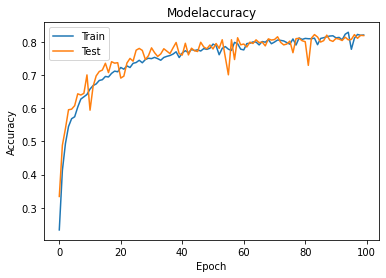

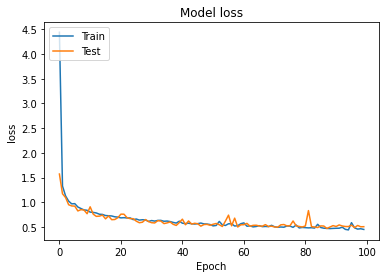

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

# Submission

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y ,random_state=40)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100

86.74603174603175

In [35]:
test = pd.read_csv('../input/forest-cover-type-prediction/test.csv')
test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

In [36]:
pred = model.predict(test.drop(columns='Id'))

In [37]:
set(pred) # xgboost icin 1 cikarmistik
pred = pred+1
set(pred) # xgboost icin 1 cikarmistik

{1, 2, 3, 4, 5, 6, 7}

In [38]:
submission = pd.read_csv('../input/forest-cover-type-prediction/sampleSubmission.csv')
submission['Cover_Type'] = pred
submission.head()

Id  Cover_Type
0  15121           2
1  15122           1
2  15123           2
3  15124           1
4  15125           2

In [39]:
submission.to_csv('submission.csv', index=False)